# Advent of code

### day 1

In [20]:
from io import StringIO

import pandas as pd
import numpy as np

f = StringIO(
"""
1000
2000
3000

4000

5000
6000

7000
8000
9000

10000
"""
)
f = open("day01.txt")
elfs = (
    pd.Series(f)
    .rename("calories")
    .str.strip()
    .loc[lambda s: s != ""]
    .astype(int)
    .to_frame()
    .reset_index()
    .assign(elf=lambda df: df["index"] - df.index)
    [["elf", "calories"]]
    .groupby(by="elf")
    .sum()
)

print(f"The elf with the most calories has {elfs.max().to_numpy()}")

top3 = (
    elfs
    .sort_values("calories", ascending=False)
    .iloc[:3]
)

print(f"The top 3 elves have {top3.sum().to_numpy()}")


The elf with the most calories has [69693]
The top 3 elves have [200945]


# day 2

In [33]:
from io import StringIO

import pandas as pd
import numpy as np

"""
The first column is what your opponent is going to play: A for Rock, B for Paper, and C for Scissors

The second column, you reason, must be what you should play in response: X for Rock, Y for Paper, and Z for Scissors

1 for Rock, 2 for Paper, and 3 for Scissors

0 if you lost, 3 if the round was a draw, and 6 if you won
"""


f = StringIO(
"""
A Y
B X
C Z
"""
)
f = open("day02.txt")

tournament = (
    pd.read_csv(f, sep=" ", header=None)
    .set_axis(["foe", "me"], axis=1)
    .replace({
        "A": 1,
        "B": 2,
        "C": 3,
        "X": 1,
        "Y": 2,
        "Z": 3,
    })
    .assign(outcome=lambda df: ((df["me"] - df["foe"] + 1) % 3) * 3)
)

print(f"The total score using the guide: {tournament.sum().loc[['me', 'outcome']].sum()}")

"""
X means you need to lose, Y means you need to end the round in a draw, and Z means you need to win
"""

tournament2 = (
    tournament
    .assign(outcome=lambda df: 3 * (df["me"] - 1))
    .assign(me=lambda df: (df["me"] + df["foe"]) % 3 + 1)
)

print(f"The total score using the 2nd guide: {tournament2.sum().loc[['me', 'outcome']].sum()}")


The total score using the guide: 12740
The total score using the 2nd guide: 11980


# day 3

In [69]:
from io import StringIO

import pandas as pd
import numpy as np

f = StringIO(
"""
vJrwpWtwJgWrhcsFMMfFFhFp
jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL
PmmdzqPrVvPwwTWBwg
wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn
ttgJtRGJQctTZtZT
CrZsJsPPZsGzwwsLwLmpwMDw
""".strip()
)
f = open("day03.txt")
total = 0
for l in f:
    ll = l.strip()
    aa = set(ll[:len(ll) // 2])
    bb = set(ll[len(ll) // 2:])
    oo = ord((aa & bb).pop())
    total += oo - 96 if oo > 95 else oo - 65 + 27

print(f"The sum to priorities is {total}")

f = StringIO(
"""
vJrwpWtwJgWrhcsFMMfFFhFp
jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL
PmmdzqPrVvPwwTWBwg
wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn
ttgJtRGJQctTZtZT
CrZsJsPPZsGzwwsLwLmpwMDw
""".strip()
)
f = open("day03.txt")
total = 0
lines = f.readlines()
for a, b, c in zip(lines[0::3], lines[1::3], lines[2::3]):
    badge = (set(a.strip()) & set(b.strip()) & set(c.strip())).pop()
    oo = ord(badge)
    total += oo - 96 if oo > 95 else oo - 65 + 27
    
print(f"The sum to the badges priorities is {total}")
    

The sum to priorities is 7980
The sum to the badges priorities is 2881


# day 4

In [90]:
from io import StringIO

import pandas as pd
import numpy as np

f = StringIO(
"""
2-4,6-8
2-3,4-5
5-7,7-9
2-8,3-7
6-6,4-6
2-6,4-8
""".strip()
)
f = open("day04.txt")

cleaning = (
    pd.read_csv(
        StringIO(f.read().replace("-", ",")),
        header=None)
    .set_axis(["a", "b", "c", "d"], axis=1)
    .assign(
        is_one_range=lambda df:
        ((df["a"] <= df["c"]) & (df["d"] <= df["b"])) |
        ((df["a"] >= df["c"]) & (df["d"] >= df["b"])))
)

print(f"""
The number of pairs where one range contains the other is {cleaning["is_one_range"].astype(int).sum()}
""".strip())

cleaning2 = (
    cleaning
    .assign(
        is_overlap=lambda df:
        ((df["a"] <= df["c"]) & (df["c"] <= df["b"])) |
        ((df["c"] <= df["a"]) & (df["a"] <= df["d"])))
)

print(f"""
The number of pairs where one range overlaps with the other is {cleaning2["is_overlap"].astype(int).sum()}
""".strip())


The number of pairs where one range contains the other is 450
The number of pairs where one range overlaps with the other is 837


# day 5

In [173]:
from copy import deepcopy
from io import StringIO

import pandas as pd
import numpy as np

f = StringIO(
"""
    [D]    
[N] [C]    
[Z] [M] [P]
 1   2   3 

move 1 from 2 to 1
move 3 from 1 to 3
move 2 from 2 to 1
move 1 from 1 to 2
""".strip("\n")
)
f = open("  day05.txt  ".strip())
lines = f.readlines()
moves = list(
    pd.DataFrame([l.strip().split() for l in lines if "move" in l])
    .iloc[:, 1::2]
    .astype(int)
    .itertuples(name=None, index=None)
)
crates0 = (
    pd.DataFrame([list(l) for l in lines if not "move" in l][:-2])
    .iloc[:, 1::4]
    .agg("".join, axis=0)
    .apply(reversed)
    .apply("".join)
    .apply(str.strip)
    .apply(list)
    .tolist()
)

crates = [None] + deepcopy(crates0)
for n, s, e in moves:
    for _ in range(n):
        crates[e].append(crates[s].pop())


print(f"""
The crates at the top of the stacks are {"".join([c[-1] for c in crates[1:]])}
""".strip())

crates = [None] + deepcopy(crates0)
for n, s, e in moves:
    crates[e] += crates[s][-n:]
    crates[s] = crates[s][:-n]


print(f"""
Using the crate mover 9001 the crates at the top of the stacks are {"".join([c[-1] for c in crates[1:]])}
""".strip())

The crates at the top of the stacks are RNZLFZSJH
Using the crate mover 9001 the crates at the top of the stacks are CNSFCGJSM


# day 6

In [180]:

from io import StringIO

import pandas as pd
import numpy as np

f = StringIO(
"""
bvwbjplbgvbhsrlpgdmjqwftvncz
""".strip("\n")
)
f = open("  day06.txt  ".strip())
word = f.read().strip()
ans = None
for i in range(len(word)):
    if len(set(word[max(0, i - 4):i])) == 4:
        ans = i
        break

print(f"""
The marker is after character {ans}
""".strip())


ans = None
for i in range(len(word)):
    if len(set(word[max(0, i - 14):i])) == 14:
        ans = i
        break

print(f"""
The start-of-message marker is after character {ans}
""".strip())

The marker is after character 1892
The start-of-message marker is after character 2313


# day 7

In [206]:
import re
from copy import deepcopy
from io import StringIO
from pathlib import Path

import pandas as pd
import numpy as np

"""
cd x
cd ..
cd /
ls

system is
{
    path: size
}
"""



f = StringIO(
"""
$ cd /
$ ls
dir a
14848514 b.txt
8504156 c.dat
dir d
$ cd a
$ ls
dir e
29116 f
2557 g
62596 h.lst
$ cd e
$ ls
584 i
$ cd ..
$ cd ..
$ cd d
$ ls
4060174 j
8033020 d.log
5626152 d.ext
7214296 k
""".strip("\n\r")
)
f = open("  day07.txt  ".strip())

commands = list(map(lambda w: w.strip("\n").split("\n"), ("\n" + f.read()).split("\n$ ")[1:]))
computer = {Path("/"): None}
wd = None

for cmd in commands:
    if cmd[0] == "cd /":
        wd = Path("/")
    elif cmd[0] == "cd ..":
        wd = wd.parent
    elif cmd[0][:3] == "cd ":
        wd /= cmd[0][3:]
    elif cmd[0] == "ls":
        for l in cmd[1:]:
            regex = re.match(r"^(\S+) (.*)$", l)
            n, sub = regex.group(1), regex.group(2)
            if not wd / sub in computer:
                computer[wd / sub] = None if n == "dir" else int(n)
    else:
        assert False, "invalid command"

computer0 = deepcopy(computer)
        
for p in sorted(list(computer0.keys()), reverse=True)[:-1]:
    computer0[p.parent] = (computer0[p.parent] or 0) + computer0[p]

print(f"""
The sum of the sizes of the files/folders below 100000: {sum([s for p, s in computer0.items() if s <= 100000 and computer[p] is None])}
""".strip())

70000000
30000000
40_000_000

ans = None
if computer0[Path("/")] <= 40_000_000:
    print(f"""
    The size of the deleted folder is {0}
    """.strip())
else:
    print(f"""
    The size of the deleted folder is {min([s for p, s in computer0.items() if computer0[Path("/")] - computer0[p] <= 40_000_000 and computer[p] is None])}
    """.strip())
    

The sum of the sizes of the files/folders below 100000: 1989474
The size of the deleted folder is 1111607


# day 8

In [314]:

from functools import reduce
from operator import or_, mul
from io import StringIO

import pandas as pd
import numpy as np

f = StringIO(
"""
30373
25512
65332
33549
35390
""".strip("\n")
)
f = open("  day08.txt  ".strip())

forest = np.array(list(map(lambda x: list(x.strip()), f.readlines())), dtype=int)
heightsU = np.roll(np.maximum.accumulate(forest, axis=0), 1, axis=0)
heightsU[0,:] = -1
heightsD = np.roll(np.maximum.accumulate(forest[::-1,:], axis=0)[::-1,:], -1, axis=0)
heightsD[-1,:] = -1
heightsL = np.roll(np.maximum.accumulate(forest, axis=1), 1, axis=1)
heightsL[:,0] = -1
heightsR = np.roll(np.maximum.accumulate(forest[:,::-1], axis=1)[:,::-1], -1, axis=1)
heightsR[:,-1] = -1 

edges = (heightsU, heightsD, heightsL, heightsR)
visible = reduce(or_, map(lambda x: x < forest, edges))

print(f"""
The number of trees visible from the outside is {visible.sum()}
""".strip())

views = {}
for i, j in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
    views[(i, j)] = forest * 0
    ax = abs(j)
    s0 = slice(None if ax != 0 else 0 if i > 0 else -1, None, 1_000_000 if ax == 0 else None)
    s1 = slice(None if ax != 1 else 0 if j > 0 else -1, None, 1_000_000 if ax == 1 else None)
    m1, m2 = slice(None, None, i or 1), slice(None, None, j or 1)
    for h in range(10):
        u0 = forest < h
        u0[s0,s1] = False
        # print("u0", u0)
        u1 = np.add.accumulate(u0[m1, m2], axis=ax)[m1, m2]
        # print("u1", u1)
        u2 = np.maximum.accumulate((u1 * np.logical_not(u0))[m1, m2], axis=ax)[m1, m2]
        # print("u2", u2)
        u3 = np.roll(u2, i + j, axis=ax)
        u3[s0,s1] = True
        # print("u3", u3)
        u4 = (u1 - u3 + 1) * (forest == h)
        u4[s0,s1] = 0
        # print("u4", u4)
        views[(i, j)] += u4

scores = reduce(mul, views.values())

print(f"""
The highest scenic score is {scores.max()}
""".strip())


The number of trees visible from the outside is 1807
The highest scenic score is 480000


# day 9

/Users/joaomatias/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


The number of positions visited is 6376
The number of positions visited by the node 9 is 2607


/Users/joaomatias/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


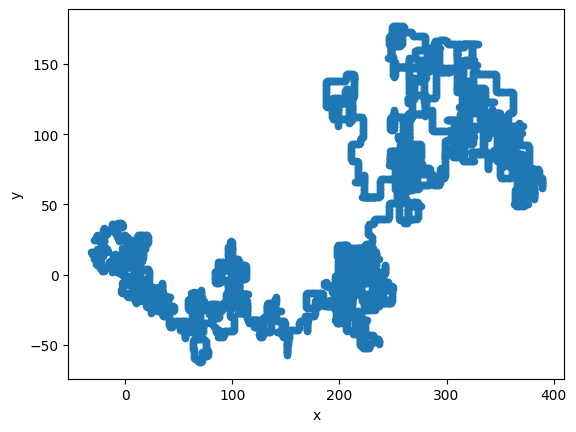

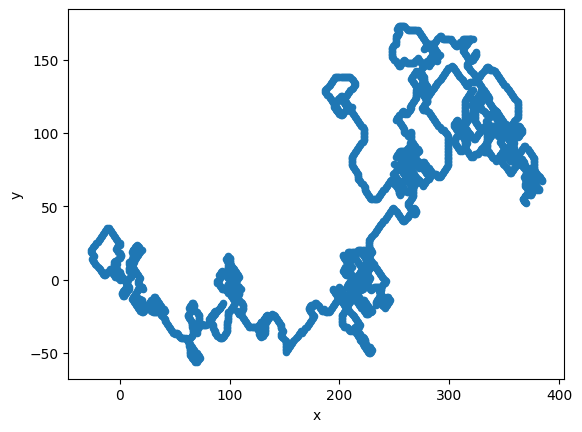

In [97]:
from functools import reduce
from operator import add
from io import StringIO

import pandas as pd
import numpy as np

f = StringIO(
"""
R 4
U 4
L 3
D 1
R 4
D 1
L 5
R 2
""".strip("\n")
)
f = open("  day09.txt  ".strip())

positions = (
    pd.read_csv(f, sep=" ", header=None)
    .set_axis(["direction", "size"], axis=1)
    .assign(
        direction=lambda df:
        df["direction"].apply({
            "R": ( 1,  0),
            "L": (-1,  0),
            "U": ( 0,  1),
            "D": ( 0, -1)}
            .get))
    .pipe(
        lambda df:
        pd.DataFrame(
            reduce(
                add,
                map(
                    lambda v: v[1] * [v[0]],
                    df.itertuples(index=None, name=None)),
                [[0, 0]])))
    .set_axis(["x", "y"], axis=1)
    .assign(x=lambda df: np.cumsum(df["x"]))
    .assign(y=lambda df: np.cumsum(df["y"]))
    .to_dict(orient="split")["data"]    
)

positions0 = positions

p = [0, 0]
ans = [p]
j = 0
while True:
    while j < len(positions) and np.abs(np.diff([p, positions[j]], axis=0)).max() <= 1:
        j += 1
    if j >= len(positions):
        break
    p = np.array([[1/3, 2/3]]).dot(np.array([p,positions[j]])).round().astype(int).flatten().tolist()
    ans.append(p)
    
pd.DataFrame(ans, columns=["x", "y"]).plot(
   x='x', 
   y='y', 
   kind='scatter',
)
    
print(f"""
The number of positions visited is {len(set(map(tuple, ans)))}
""".strip())

for _ in range(9):
    p = [0, 0]
    ans = [p]
    j = 0
    while True:
        while j < len(positions) and np.abs(np.diff([p, positions[j]], axis=0)).max() <= 1:
            j += 1
        if j >= len(positions):
            break
        p = np.array([[1/3, 2/3]]).dot(np.array([p,positions[j]])).round().astype(int).flatten().tolist()
        ans.append(p)
    positions = ans

pd.DataFrame(ans, columns=["x", "y"]).plot(
   x='x', 
   y='y', 
   kind='scatter',
)

print(f"""
The number of positions visited by the node 9 is {len(set(map(tuple, ans)))}
""".strip())


# day 10

In [189]:
from io import StringIO

import pandas as pd
import numpy as np

f = StringIO(
"""
addx 15
addx -11
addx 6
addx -3
addx 5
addx -1
addx -8
addx 13
addx 4
noop
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx -35
addx 1
addx 24
addx -19
addx 1
addx 16
addx -11
noop
noop
addx 21
addx -15
noop
noop
addx -3
addx 9
addx 1
addx -3
addx 8
addx 1
addx 5
noop
noop
noop
noop
noop
addx -36
noop
addx 1
addx 7
noop
noop
noop
addx 2
addx 6
noop
noop
noop
noop
noop
addx 1
noop
noop
addx 7
addx 1
noop
addx -13
addx 13
addx 7
noop
addx 1
addx -33
noop
noop
noop
addx 2
noop
noop
noop
addx 8
noop
addx -1
addx 2
addx 1
noop
addx 17
addx -9
addx 1
addx 1
addx -3
addx 11
noop
noop
addx 1
noop
addx 1
noop
noop
addx -13
addx -19
addx 1
addx 3
addx 26
addx -30
addx 12
addx -1
addx 3
addx 1
noop
noop
noop
addx -9
addx 18
addx 1
addx 2
noop
noop
addx 9
noop
noop
noop
addx -1
addx 2
addx -37
addx 1
addx 3
noop
addx 15
addx -21
addx 22
addx -6
addx 1
noop
addx 2
addx 1
noop
addx -10
noop
noop
addx 20
addx 1
addx 2
addx 2
addx -6
addx -11
noop
noop
noop
""".strip("\n")
)
f = open("  day10.txt  ".strip())

crt = (
    pd.read_csv(f, sep=" ", header=None, names=["op", "value"])
    .fillna(0)
    .assign(next_cycle=lambda df: (df["op"] == "addx") + 1)
    .assign(next_cycle=lambda df: np.cumsum(df["next_cycle"]).astype(int) + 1)
    .pipe(lambda df: pd.concat((
        pd.DataFrame({"op": "", "value": 1, "next_cycle": 1}, index=[0]),
        df)))
    .assign(register=lambda df: np.cumsum(df["value"]).astype(int))
    .reset_index(drop=True)
)

signal = (
    crt
    .assign(forty=lambda df: ((20 - df["next_cycle"]) // 40).abs() * 40 + 20)
    .groupby(by="forty", as_index=False)
    .last()
    .pipe(lambda df: df if df["next_cycle"].iloc[-1] ==  df["forty"].iloc[-1] else df.iloc[:-1])
    .assign(ss=lambda df: df["register"] * df["forty"])
)

print(f"""
The sum of the signal strengths is {signal["ss"].sum()}
""".strip())

print()

print(f"""
The secret message in the crt is...
""".strip())

(
    crt
    [["next_cycle", "register"]]
    .set_index("next_cycle")
    .pipe(
        lambda df:
        pd.concat((
            df,
            pd.DataFrame(index=pd.Index(range(1, df.index[-1]), name="next_cycle")))))
    .groupby("next_cycle")
    .first()
    .fillna(method="ffill")
    .astype(int)
    .assign(position=lambda df: (df.index - 1) % 40)
    .assign(pixel=lambda df: ((df["register"] - df["position"]).abs().apply(lambda x: "#" if x <= 1 else ".")))
    .assign(line=lambda df: (df.index - 1) // 40)
    .groupby(by="line")
    ["pixel"]
    .agg("".join)
    .pipe(lambda s: print(*s, sep="\n"))
)


The sum of the signal strengths is 15260

The secret message in the crt is...
###...##..#..#.####..##..#....#..#..##..
#..#.#..#.#..#.#....#..#.#....#..#.#..#.
#..#.#....####.###..#....#....#..#.#....
###..#.##.#..#.#....#.##.#....#..#.#.##.
#....#..#.#..#.#....#..#.#....#..#.#..#.
#.....###.#..#.#.....###.####..##...###.
.


# day 11

In [244]:

import re

from io import StringIO
from copy import deepcopy
from math import prod, lcm
from inspect import signature

import pandas as pd
import numpy as np

f = StringIO(
"""
Monkey 0:
  Starting items: 79, 98
  Operation: new = old * 19
  Test: divisible by 23
    If true: throw to monkey 2
    If false: throw to monkey 3

Monkey 1:
  Starting items: 54, 65, 75, 74
  Operation: new = old + 6
  Test: divisible by 19
    If true: throw to monkey 2
    If false: throw to monkey 0

Monkey 2:
  Starting items: 79, 60, 97
  Operation: new = old * old
  Test: divisible by 13
    If true: throw to monkey 1
    If false: throw to monkey 3

Monkey 3:
  Starting items: 74
  Operation: new = old + 3
  Test: divisible by 17
    If true: throw to monkey 0
    If false: throw to monkey 1
""".strip("\n")
)
f = open("  day11.txt  ".strip())

"""
monkey
{
    "items": [...],
    "op": lambda...,
    "test": lambda : int,
    "inspected":,
}
"""

monkeys = []
while True:
    monkey = {}
    assert f.readline()[:6] == "Monkey"
    monkey["items"] = list(map(int, re.match(r"^\s*Starting items: (.*)\n$", f.readline()).group(1).split(", ")))
    monkey["op"] = lambda old, ex=re.match(r"^\s*Operation: new = (.*)\n$", f.readline()).group(1): eval(ex)
    monkey["test"] = (
        lambda
        wl,
        q=int(re.match(r"^\s*Test: divisible by (\S*)\n$", f.readline()).group(1)),
        tt=int(re.match(r"^\s*If true: throw to monkey (\S*)\n$", f.readline()).group(1)),
        ff=int(re.match(r"^\s*If false: throw to monkey (\S*)\n*$", f.readline()).group(1)):
        tt if wl % q == 0 else ff
    )
    monkey["inspected"] = 0
    monkeys.append(monkey)
    if f.readline() != "\n":
        break

monkeys0 = deepcopy(monkeys)
        
for _ in range(20):
    for i in range(len(monkeys)):
        monkey = monkeys[i]
        while len(monkey["items"]) > 0:
            monkey["inspected"] += 1
            wl = monkey["op"](monkey["items"].pop()) // 3
            monkeys[monkey["test"](wl)]["items"].append(wl)
        

print(f"""
The level of monkey business is {prod(list(sorted([d["inspected"] for d in monkeys], reverse=True))[:2])}
""".strip())

monkeys = deepcopy(monkeys0)
mm = lcm(*[signature(m["test"]).parameters["q"].default for m in monkeys])

for _ in range(10000):
    for i in range(len(monkeys)):
        monkey = monkeys[i]
        while len(monkey["items"]) > 0:
            monkey["inspected"] += 1
            wl = monkey["op"](monkey["items"].pop()) % mm
            monkeys[monkey["test"](wl)]["items"].append(wl)

print(f"""
The level of monkey business after a very long time is {prod(list(sorted([d["inspected"] for d in monkeys], reverse=True))[:2])}
""".strip())


The level of monkey business is 67830
The level of monkey business after a very long time is 15305381442


# template